In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import ast


# Load Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Dataset cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

df_DA_US['salary_year_avg'].sample(10)


773696    119550.0
684690     80500.0
685472     82500.0
278107     46500.0
581853     99500.0
371001     70000.0
755622     80000.0
248991     55330.0
442004     80000.0
307148     92500.0
Name: salary_year_avg, dtype: float64

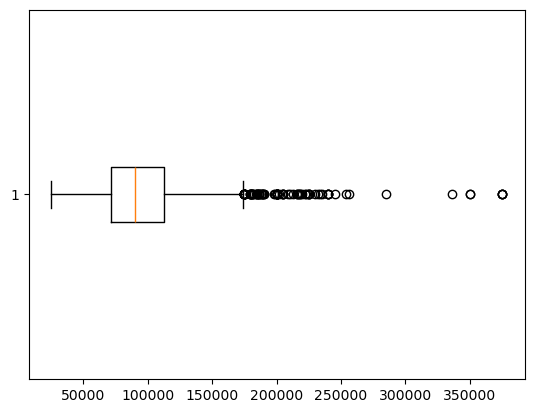

In [11]:
plt.boxplot(df_DA_US['salary_year_avg'], vert=False)
plt.show()

/var/folders/2m/1klq4c0s1jvcxddzk4mm9tk00000gn/T/ipykernel_3739/3955024361.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


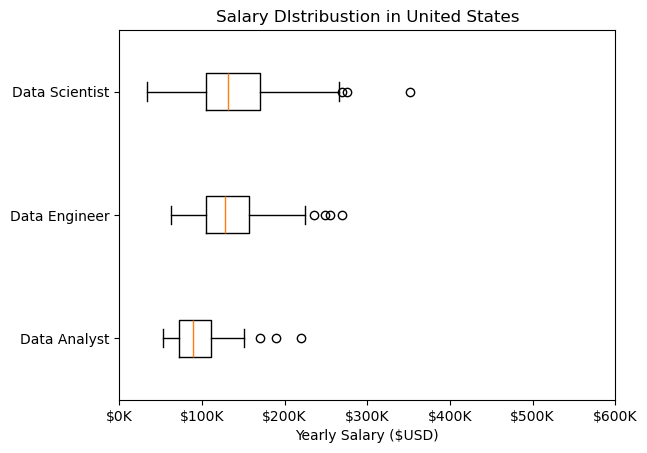

In [42]:
job_titles = ['Data Analyst','Data Engineer', 'Data Scientist' ]

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_location'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary DIstribustion in United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)

plt.show()